In [1]:
# 매직명령어, 그래프의 출력 과정이 세부적으로 나타나는 옵션
%matplotlib inline

# 그래프 수정 가능
# %matplotlib nbagg

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# randn(n) : 정규분포 난수 n개 생성
# Series : 1차원 배열, DataFrame : 2차원 배열
# cumsum : 누적합을 계산
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s

0     1.523757
10    2.446383
20    2.222609
30    2.141916
40    0.434588
50    0.573199
60    1.191966
70    1.631478
80    1.246993
90    1.295706
dtype: float64

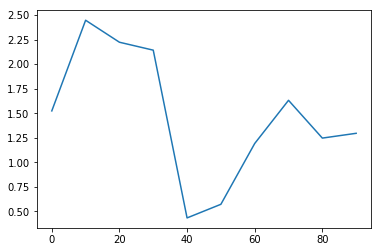

In [3]:
s.plot()

In [4]:
# 데이터프레임 생성
df = pd.DataFrame(np.random.randn(10, 4),
                 columns = ["A", "B", "C", "D"],
                 index = np.arange(0, 100, 10))
df

,A,B,C,D
0,0.050611,0.691478,-0.751080,0.930417
10,0.730334,0.262047,1.399731,-0.387466
20,0.253666,0.937825,0.517635,-0.862398
30,-1.216108,-0.274791,-0.416614,0.080029
40,1.501399,-2.584684,-0.403769,-1.344251
50,-1.055395,-0.593760,-0.185286,0.678066
60,-1.848922,0.826510,-1.009314,0.262322
70,2.545008,0.389139,-1.046959,-0.173529
80,0.776077,-0.081660,0.409319,-0.294838
90,-1.973120,-0.631701,0.671879,-0.762551


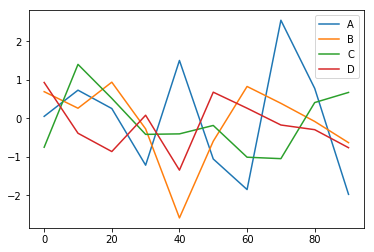

In [5]:
df.plot()

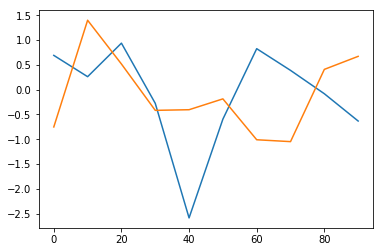

In [6]:
df["B"].plot()
df["C"].plot()

In [7]:
# list("abcd...") : a,b,c,d 식으로 리스트로 만들어짐
# 시리즈 값을 막대 그래프로 출력
s2 = pd.Series(np.random.rand(16), index=list("abcdefghijklmnop"))
s2

a    0.917802
b    0.501697
c    0.395253
d    0.347471
e    0.219013
f    0.707302
g    0.763819
h    0.411097
i    0.405174
j    0.404011
k    0.608740
l    0.295768
m    0.959128
n    0.820326
o    0.815815
p    0.323882
dtype: float64

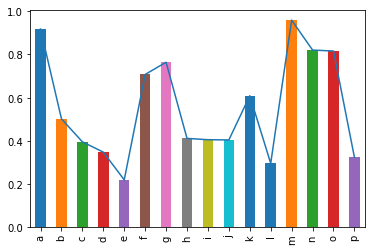

In [8]:
# 수직 방향 막대그래프
s2.plot()
s2.plot(kind="bar")

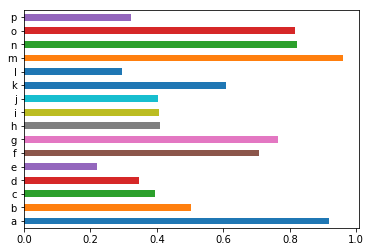

In [9]:
# 수평 방향
s2.plot(kind="barh")

In [10]:
from matplotlib import rc
# 한글 처리를 위해 폰트 설정
rc('font', family='AppleGothic')
# 음수 부호가 깨지지 않도록 설정
plt.rcParams['axes.unicode_minus'] = False

In [11]:
# 데이터 프레임
df2 = pd.DataFrame(np.random.rand(6, 4),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["사과", "포도", "배", "감"], name="과일"))
df2

과일,사과,포도,배,감
one,0.248161,0.178927,0.587144,0.803642
two,0.413326,0.528518,0.022427,0.867443
three,0.532840,0.047819,0.569081,0.192991
four,0.926616,0.449449,0.706151,0.003702
five,0.471625,0.070740,0.332116,0.975184
six,0.540981,0.334955,0.366496,0.765914


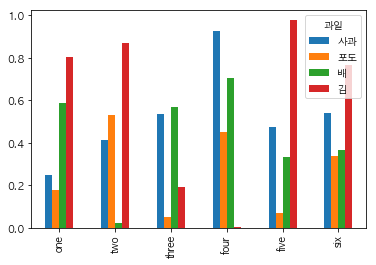

In [12]:
# x축 인덱스, y축 값
# x축 하나의 인덱스에 대해 여러개의 값이 표시됨
df2.plot(kind="bar")

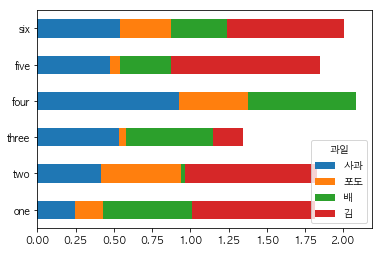

In [13]:
# 수평 방향
# stacked=True 하나의 인덱스에 대해 한줄로 쌓아서 표시
df2.plot(kind="barh", stacked=True)

In [14]:
# 히스토그램 : x변수가 가질 수 있는 값의 구간, 갯수를 막대 형태로 출력
# 히스토그램은 값만 필요하고 인덱스는 필요하지 않음
# normal() 정규분포
s3 = pd.Series(np.random.normal(0, 100, size=200))
s3.head()

0    114.041644
1   -210.508278
2    170.639448
3    -83.426735
4    -75.913741
dtype: float64

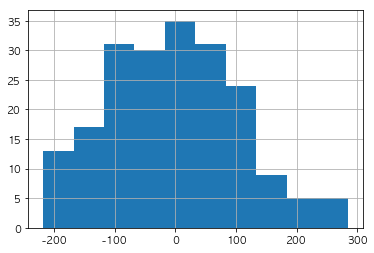

In [15]:
# x축 구간은 기본값으로 10개로 설정됨
plt.rcParams['axes.unicode_minus'] = False
s3.hist()

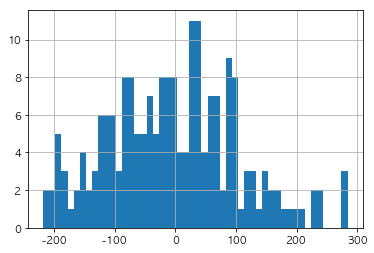

In [16]:
# x축 구간의 갯수 지정
plt.rcParams['axes.unicode_minus'] = False
s3.hist(bins=50)

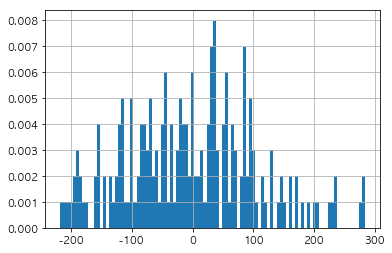

In [17]:
# normed 정규분포
# 정규분포 - 종 모양을 가짐
s3.hist(bins=100, density=True)

In [18]:
# 산점도 : 서로 다른 독립변수 x1, x2의 관계를 파악할 때 사용
# normal(mu, sigma, size=(rows, cols))
# mu : 중앙값(median), sigma : 표준편차
x1 = np.random.normal(1, 1, size=(100, 1))
x2 = np.random.normal(-2, 4, size=(100, 1))
# concatenate : 열방향으로 연결 axis = 1 가로방향, axis = 0 세로방향
# 100x2 리스트가 생성됨
X = np.concatenate((x1, x2), axis=1)
# 첫 5행 출력
print(X[:5])

[[-0.49657071  1.70429593]
 [ 1.25480646 -5.56017996]
 [ 1.49895428 -5.30094363]
 [ 1.81993075 -3.36310175]
 [ 1.26961161  3.12413283]]


In [19]:
df3 = pd.DataFrame(X, columns=["x1", "x2"])
df3.head()

,x1,x2
0,-0.496571,1.704296
1,1.254806,-5.560180
2,1.498954,-5.300944
3,1.819931,-3.363102
4,1.269612,3.124133


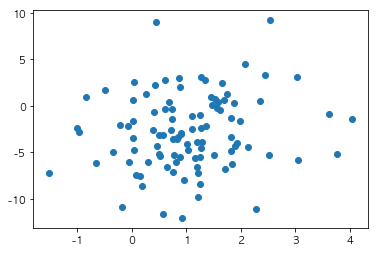

In [20]:
# x1과 x2의 상관관계
# x1(x축), x2(y축)
# 양의 상관관계 : 산점도가 좌측하단에서 우측상단으로
# 음의 상관관계 : 산점도가 좌측상단에서 우측하단으로
plt.scatter(df3["x1"], df3["x2"])

2014-02-16 00:00:00 missing data


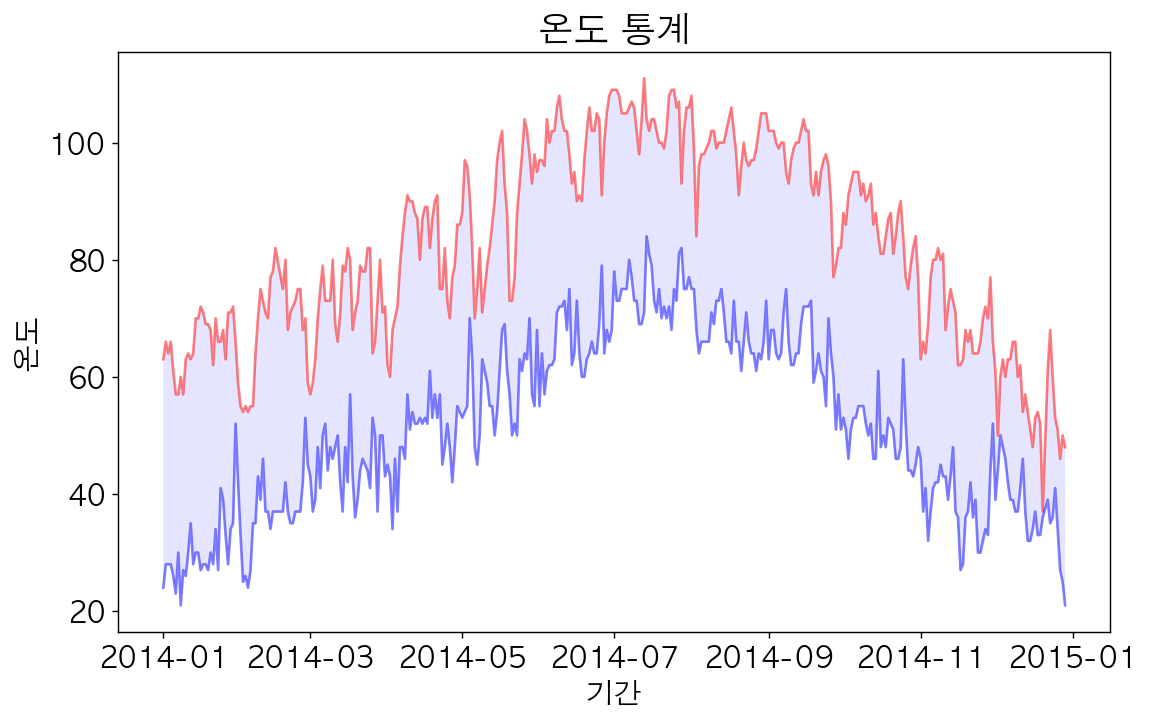

In [21]:
import csv
from datetime import datetime
filename = './data/temp/temperature_2014.csv'
# 파일 오픈
with open(filename) as f:
    # 데이터 로딩
    reader = csv.reader(f)
    # 파일의 첫번째 행
    header_row = next(reader)
    dates, highs, lows = [], [], []
    for row in reader: # 한줄씩 읽음
        try:
            # strftime : 날짜를 문자열로
            # strptime : 문자열을 날짜로
            current_date = datetime.strptime(row[0], "%Y-%m-%d")
            high = int(row[1]) # 최고온도
            low = int(row[3]) # 최저온도
        except ValueError:
            print(current_date, 'missing data')
        else: # 예외가 발생하지 않으면
            # 리스트에 추가
            dates.append(current_date)
            highs.append(high)
            lows.append(low)
            
# 그래프 생성
fig = plt.figure(dpi=128, figsize=(10, 6))
# x축 dates, y축 highs, 색상 red,
# 투명도 0.5, 0.0 완전투명 ~ 1.0 완전불투명
plt.plot(dates, highs, c="red", alpha=0.5)
plt.plot(dates, lows, c="blue", alpha=0.5)
# 두개의 선 사이(highs~lows)를 색칠함, alpha=0.1 투명도 0.1
plt.fill_between(dates, highs, lows, facecolor="blue", alpha=0.1)
# 그래프 스타일
plt.title("온도 통계", fontsize=20)
plt.xlabel("기간", fontsize=16)
plt.ylabel("온도", fontsize=16)
plt.tick_params(axis="both", labelsize=16) # 눈금 표시
plt.show()

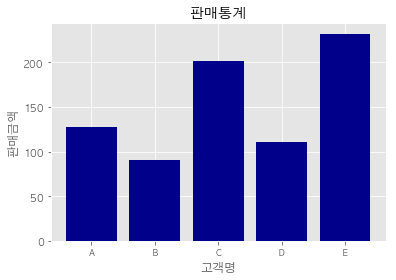

In [22]:
# 막대 그래프
# R용 시각화 패키지 ggplot의 스타일 적용
plt.style.use('ggplot')
customers = ['A', 'B', 'C', 'D', 'E']
customers_index = range(len(customers))
sale_amounts = [127, 90, 201, 111, 232]
# figure(그림) 객체를 만든다.
fig = plt.figure()
# figure 객체 하위에 그래프를 추가
# 1행 1열 1개의 하위 그래프
ax1 = fig.add_subplot(1, 1, 1)
# 막대 그래프 bar(x축, y축, 가운데정렬, 막대색상)
ax1.bar(customers_index, sale_amounts, align="center", color="darkblue")
# x축 눈금 위치
ax1.xaxis.set_ticks_position('bottom')
# y축 눈금 위치
ax1.yaxis.set_ticks_position('left')
# xticks(수치데이터, 대체텍스트)
# 0,1,2,3,4 대신 A,B,C,D,E로 출력됨
plt.xticks(customers_index, customers, rotation=0, fontsize="small")
plt.xlabel("고객명")
plt.ylabel("판매금액")
plt.title("판매통계")
# 그래프를 이미지로 저장, dpi 해상도, tight 그림을 둘러싼 여백 제거
plt.savefig("./data/images/bar_plot.png", dpi=400, bbox_inches="tight")
plt.show()

In [23]:
from ggplot import *
# ggplot 을 사용하기 위해 pandas 버전을 0.22 버전으로 낮춤

/Users/kyeongmin/anaconda3/envs/django/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/kyeongmin/anaconda3/envs/django/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


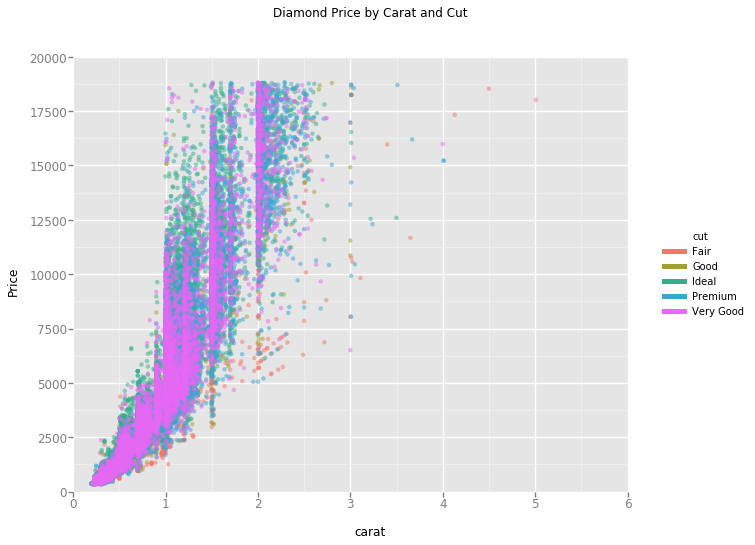

<ggplot: (-9223372036555168824)>


In [24]:
# ggplot 패키지에 포함된 diamonds 데이터셋 사용
# diamonds 데이터셋(내장 데이터셋)의 헤더 확인
print(diamonds.head())
# aes(x축 데이터, y축 데이터, 색상옵션)
# colour = "cut" : cut 필드를 색상으로 표현
plt3 = ggplot(diamonds, aes(x='carat', y='price', colour='cut')) +\
            geom_point(alpha=0.5) +\
            scale_color_gradient(low='#05D9F6', high='#5011D1') +\
            xlim(0, 6) + ylim(0, 20000) + ylab("carat") +\
            ylab("Price") + ggtitle("Diamond Price by Carat and Cut") +\
            theme_gray()
print(plt3)

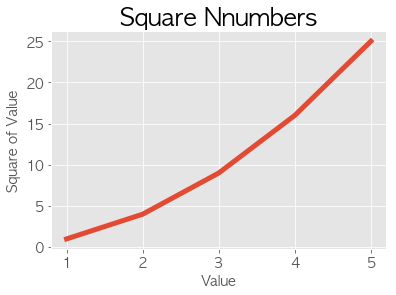

In [25]:
# x축 데이터
input_values = [1, 2, 3, 4, 5]
# y축 데이터
squares = [1, 4, 9, 16, 25]
# 그래프 출력-선그래프 plot(x, y)
plt.plot(input_values, squares, linewidth=5)
# 그래프 제목
plt.title("Square Nnumbers", fontsize=24)
# x축 레이블
plt.xlabel("Value", fontsize=14)
# y축 레이블
plt.ylabel("Square of Value", fontsize=14)
# 눈금 사이즈
plt.tick_params(axis="both", labelsize=14)
# 선 그래프 출력
plt.show()

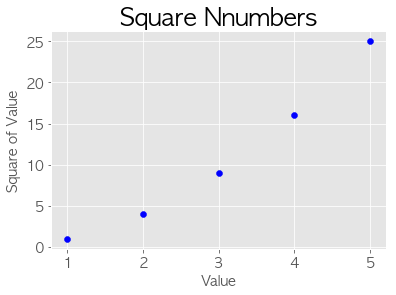

In [27]:
# x축 데이터
input_values = [1, 2, 3, 4, 5]
# y축 데이터
squares = [1, 4, 9, 16, 25]
# 그래프 출력-선그래프 plot(x, y)
# plt.plot(input_values, squares, linewidth=5)
plt.scatter(input_values, squares, c="blue")
# 그래프 제목
plt.title("Square Nnumbers", fontsize=24)
# x축 레이블
plt.xlabel("Value", fontsize=14)
# y축 레이블
plt.ylabel("Square of Value", fontsize=14)
# 눈금 사이즈
plt.tick_params(axis="both", labelsize=14)
# 선 그래프 출력
plt.show()

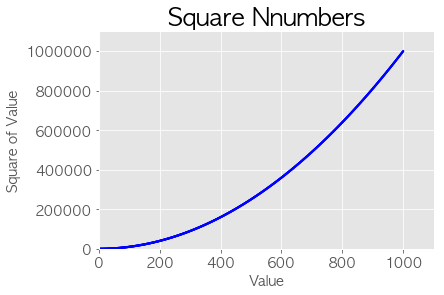

In [26]:
# 1~1000 리스트
x_values = list(range(1, 1001))
# 제곱한 값
y_values = [x**2 for x in x_values]
# scatter(x좌표, y좌표 ... ) - 산점도(데이터를 점으로 표현함)
# c="blue" 색상 설정
# edgecolor = 'none' : 외곽선 제거
# s 점의 갯수
plt.scatter(x_values, y_values, c="blue", edgecolor="none", s=5)
# 그래프 제목
plt.title("Square Nnumbers", fontsize=24)
# x축 레이블
plt.xlabel("Value", fontsize=14)
# y축 레이블
plt.ylabel("Square of Value", fontsize=14)
# 눈금 사이즈
plt.tick_params(axis="both", labelsize=14)
# 축의 범위 지정(x 최솟값, x 최댓값, y 최솟값, y 최댓값)
plt.axis([0, 1100, 0, 1100000])
# 선 그래프 출력
plt.show()

## 점이 1000개라서 선으로 보임

In [32]:
# 무작위 그래프 그리기
from random import choice
# Random Walk : 그때그때 무작위로 데이터를 만드는 작업
class RandomWalk():
    # 생성자
    def __init__(self, num_points=5000):
        self.num_points = num_points
        
        # x, y 좌표를 저장할 리스트를 만들고 값을 0으로 초기화
        self.x_values = [0]
        self.y_values = [0]
        
    def fill_walk(self):
        while len(self.x_values) < self.num_points:
            # choice([1, -1]) : 1 또는 -1을 리턴,
            # 1이면 오른쪽, -1이면 왼쪽 방향으로 처리
            x_direction = choice([1, -1])
            # 0~4 무작위 선ㄴ택
            x_distance = choice([0, 1, 2, 3, 4])
            # 방향에 거리를 곱함
            x_step = x_direction * x_distance
            
            y_direction = choice([1, -1])
            y_distance = choice([0, 1, 2, 3, 4])
            y_step = y_direction * y_distance
            
            # 값이 모두 0이면 계속 진행(다시 선택)
            if x_step == 0 and y_step == 0:
                continue
                
            # 리스트[-1] 마지막 요소
            # 마지막 요소의 값에 더하여 다음 x, y 값을 설정
            next_x = self.x_values[-1] + x_step
            next_y = self.y_values[-1] + y_step
            
            # 리스트에 추가
            self.x_values.append(next_x)
            self.y_values.append(next_y)

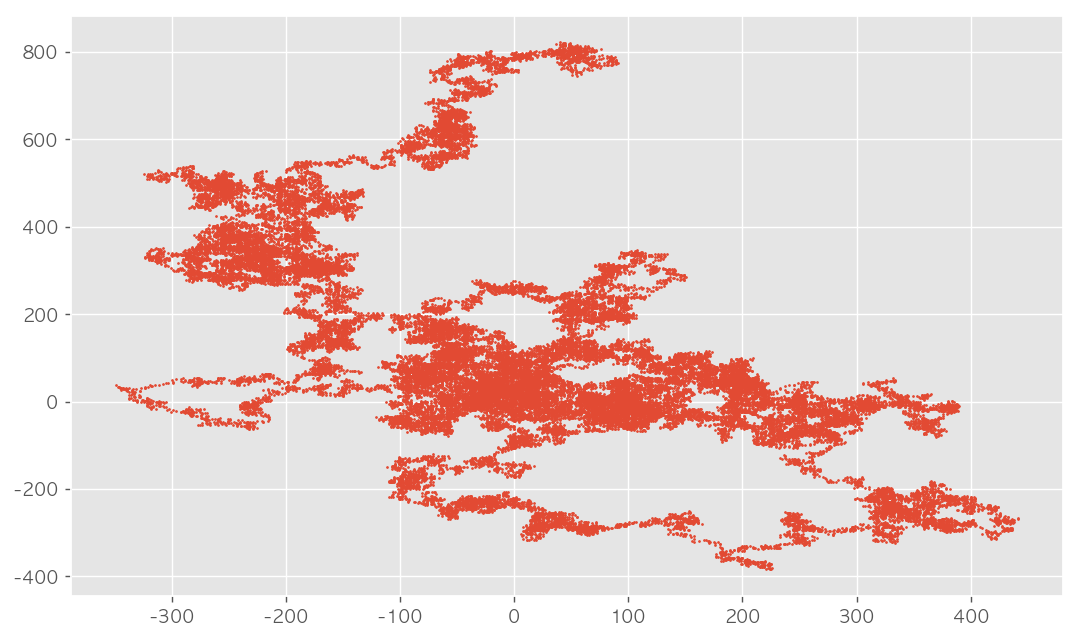

계속 할까요?(y/n): y


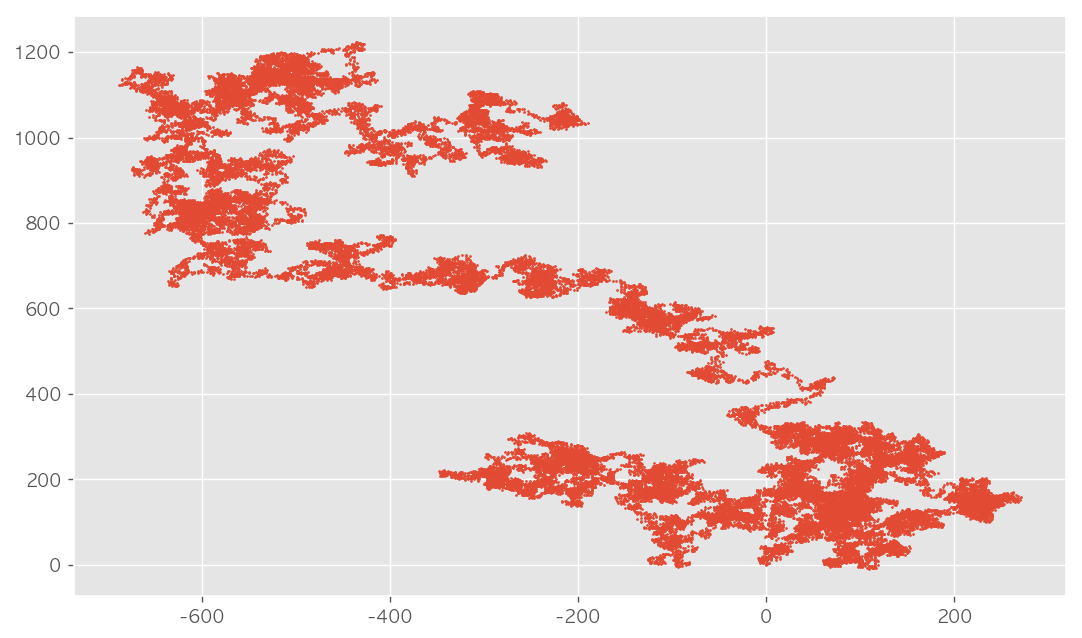

계속 할까요?(y/n): n


In [33]:
while True:
    # 5만개의 좌표 생성
    rw = RandomWalk(50000)
    rw.fill_walk()
    
    # 그래프 사이즈 설정, 128 dpi, 가로 10인치, 세로 6인치
    plt.figure(dpi=128, figsize=(10, 6))
    
    # 좌표 리스트 생성
    point_numbers = list(range(rw.num_points))
    # 산점도 그리기(s 점의 갯수)
    plt.scatter(rw.x_values, rw.y_values, s=1)
    
    plt.show()
    
    keep_running = input("계속 할까요?(y/n): ")
    if keep_running == "n":
        break

In [34]:
# 주사위 굴리기
from random import randint
class Die():
    # 생성자
    def __init__(self, sides=6):
        self.sides = sides
        
    def roll(self):
        # randint(start, end) : start ~ end 사이의 정수 난수 발생
        return randint(1, self.sides)

In [36]:
# SVG 차트를 그리기 위해 pygal 설치
# pip install pygal
# 실행 결과는 생성된 svg 파일을 웹브라우저로 열어서 확인
import pygal
die = Die()
# 주사위를 1000번 굴려서 리스트에 결과 저장
results = []
# range(1000) : 0 ~ 999
for roll_num in range(1000):
    result = die.roll()
    results.append(result)

# 결과를 분석하기 위한 리스트
frequencies = []
# range(1, 7) : 1 ~ 6
for value in range(1, die.sides + 1):
    # 주사위 숫자별로 카운트
    frequency = results.count(value)
    frequencies.append(frequency)
    
# 히스토그램 그리기
hist = pygal.Bar()
hist.title = "주사위 통계"
hist.x_labels = ['1', '2', '3', '4', '5', '6']
hist.x_title = "Result"
hist.y_title = "Frequency"
# 히스토그램에 숫자별 카운트 데이터를 추가
hist.add("주사위", frequencies)
# 파일로 저장
hist.render_to_file("./data/images/die_visual.svg")
# 웹브라우저로 열어서 확인

In [38]:
# csv를 읽어서 데이터프레임으로 리턴
names = pd.read_csv("./data/NationalNames.csv",
                   header=0,
                   names=["id", "name", "year", "gender", "births"])

# 데이터프레임의 자료 갯수 확인
names.shape

(1825433, 5)

In [39]:
# 5개 행 확인
names.head()

,id,name,year,gender,births
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [40]:
# 피벗테이블 생성
# index 행인덱스, columns 컬럼, values 합산할 값들
# aggfunc 집계함수
total_births = names.pivot_table(index="year",
                                columns=["gender"],
                                values="births",
                                aggfunc="sum")

total_births.head(10)

gender,F,M
year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
1885,133055,107800
1886,144535,110784
1887,145982,101414
1888,178627,120853


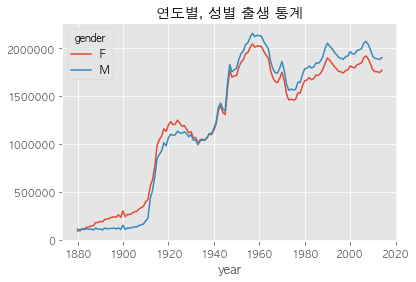

In [41]:
total_births.plot(title="연도별, 성별 출생 통계")